In [ ]:
!pip install alphabet_detector
!pip install arabert

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp -r drive/MyDrive/IFT714/* .

Mounted at /content/drive


In [ ]:
from Models.ArabicTweets.ArabertLM import ArabertLM
from Models.ArabicTweets.CNN import CNN
from Models.ArabicTweets.LogisticRegressionClass import LogisticRegressionClass
from Models.ArabicTweets.MarberLM import MarberLM
from Models.ArabicTweets.RNN import RNN
from Models.ArabicTweets.SVM import SVM
from prog.ArabicTextCleaning import ArabicTextCleaning
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Clean Data

In [ ]:
path = 'train/train.Ar.csv'
ArbTc = ArabicTextCleaning(path)
train_data = ArbTc.load_data()
train_data['text']= train_data['text'].apply(ArbTc.clean_doc)
train_data = ArbTc.drop_columns(train_data)
ArbTc.translate_dialect(train_data)
train_data_original = train_data

# Using Arabert

### Generate Embeddings

In [ ]:
Arabert = ArabertLM()
train_data = train_data_original.copy()
train_data['text_embeddings']= train_data['text'].apply(Arabert.generate_embeddings)
train_data.drop(['text'], axis =1)
embeddings_list = train_data['text_embeddings'].tolist()
X = [embedding[0] for embedding in embeddings_list]
X_np = [np.array(embedding) for embedding in X]

# Pad sequences
max_length = max(len(embedding) for embedding in X_np)
X = pad_sequences(X_np, maxlen=max_length, padding='post', dtype='float32')
X = X.reshape((X.shape[0], -1))

y = np.array(train_data['sarcastic'])

In [ ]:
X_train, X_test, y_train, y_test = ArbTc.split_data(X, y)

### Classification using Logistic Regression

In [ ]:
Lr = LogisticRegressionClass()
y_pred = Lr.generatePrediction(X_train, y_train, X_test)
accuracy, f1 = Lr.evaluateModel(y_pred, y_test)
print("Accuracy of Logistic REgression using Arabert embeddings:", accuracy)
print("f1 score of Logistic REgression using Arabert embeddings:", f1)


Accuracy of Logistic REgression using Arabert embeddings: 0.8663446054750402
f1 score of Logistic REgression using Arabert embeddings: 0.7260726072607261


### Classification using SVM

In [ ]:
svm = SVM()
y_pred = svm.generatePredictions(X_train, y_train, X_test)
accuracy, f1 = svm.evaluate_model(y_pred, y_test)
print("Accuracy of SVM using Arabert embeddings:", accuracy)
print("f1 score of SVM using Arabert embeddings:", f1)

Accuracy of SVM using Arabert embeddings: 0.8582930756843801
f1 score of SVM using Arabert embeddings: 0.7197452229299361


### Classification using RNN

In [ ]:
rnn = RNN()
rnn_model = rnn.configModel()


Epoch 1/10
78/78 [==============================] - 61s 617ms/step - loss: 1.0098 - accuracy: 0.6300 - val_loss: 0.7897 - val_accuracy: 0.3994
Epoch 2/10
78/78 [==============================] - 48s 615ms/step - loss: 0.5755 - accuracy: 0.7711 - val_loss: 0.7739 - val_accuracy: 0.5427
Epoch 3/10
78/78 [==============================] - 44s 565ms/step - loss: 0.4802 - accuracy: 0.8041 - val_loss: 0.8595 - val_accuracy: 0.5556
Epoch 4/10
78/78 [==============================] - 47s 608ms/step - loss: 0.4308 - accuracy: 0.8138 - val_loss: 0.8627 - val_accuracy: 0.6006
Epoch 5/10
78/78 [==============================] - 47s 602ms/step - loss: 0.3407 - accuracy: 0.8460 - val_loss: 0.7560 - val_accuracy: 0.6957
Epoch 6/10
78/78 [==============================] - 48s 617ms/step - loss: 0.3357 - accuracy: 0.8440 - val_loss: 0.5697 - val_accuracy: 0.7552
Epoch 7/10
78/78 [==============================] - 46s 585ms/step - loss: 0.3166 - accuracy: 0.8549 - val_loss: 0.5055 - val_accuracy: 0.7762

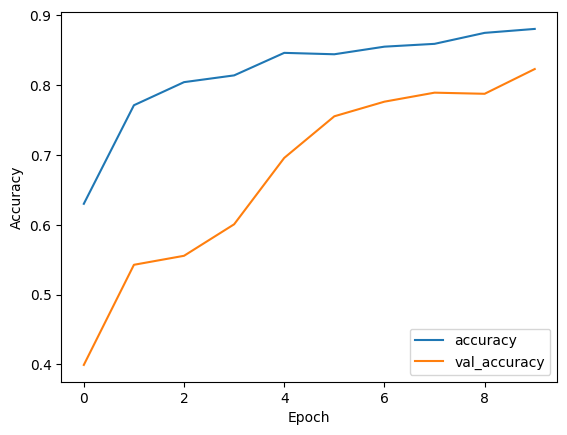

In [ ]:
embeddings_list = train_data['text_embeddings'].tolist()
X = [embedding[0] for embedding in embeddings_list]
X_np = [np.array(embedding) for embedding in X]

max_length = max(len(embedding) for embedding in X_np)
X = pad_sequences(X_np, maxlen=max_length, padding='post', dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
y_pred = rnn.predict(X_test, rnn_model)
test_precision, test_recall, test_f1_score, test_loss, test_accuracy = rnn.evaluateRNN(X_test, y_test, y_pred, rnn_model)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
rnn.plotTrainingHistory(history)

### Classification usinc CNN

Epoch 1/10
31/31 [==============================] - 10s 201ms/step - loss: 0.7436 - accuracy: 0.4929 - val_loss: 0.6164 - val_accuracy: 0.7887
Epoch 2/10
31/31 [==============================] - 7s 228ms/step - loss: 0.6089 - accuracy: 0.6714 - val_loss: 0.5334 - val_accuracy: 0.7867
Epoch 3/10
31/31 [==============================] - 5s 176ms/step - loss: 0.5523 - accuracy: 0.7384 - val_loss: 0.4863 - val_accuracy: 0.7867
Epoch 4/10
31/31 [==============================] - 6s 211ms/step - loss: 0.5013 - accuracy: 0.7631 - val_loss: 0.4494 - val_accuracy: 0.7867
Epoch 5/10
31/31 [==============================] - 6s 193ms/step - loss: 0.4772 - accuracy: 0.7697 - val_loss: 0.4202 - val_accuracy: 0.8109
Epoch 6/10
31/31 [==============================] - 6s 180ms/step - loss: 0.4443 - accuracy: 0.7812 - val_loss: 0.3960 - val_accuracy: 0.8431
Epoch 7/10
31/31 [==============================] - 7s 226ms/step - loss: 0.4163 - accuracy: 0.7949 - val_loss: 0.3748 - val_accuracy: 0.8531
Epoch

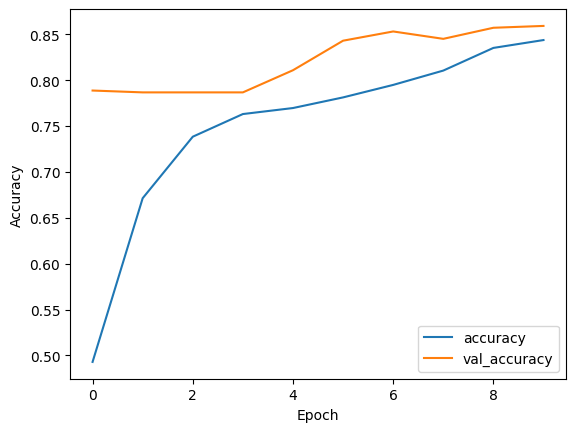

In [ ]:
cnn = CNN()
input_shape = X_train.shape[1:]
cnn_model = cnn.configModel(input_shape)
history2 = cnn_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)
y_pred = cnn.predict(X_test, cnn_model)
test_precision, test_recall, test_f1_score, test_loss, test_accuracy = cnn.evaluateCNN(X_test, y_test, y_pred, cnn_model)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
cnn.plotTrainingHistory(history2)


# Using Marbert

### Generate Embeddings

In [ ]:
Marbert = MarberLM()
train_data = train_data_original.copy()
train_data['text_embeddings']= train_data['text'].apply(Marbert.generate_embeddings)
train_data.drop(['text'], axis =1)
embeddings_list = train_data['text_embeddings'].tolist()
X = [embedding[0] for embedding in embeddings_list]
X_np = [np.array(embedding) for embedding in X]

# Pad sequences
max_length = max(len(embedding) for embedding in X_np)
X = pad_sequences(X_np, maxlen=max_length, padding='post', dtype='float32')
X = X.reshape((X.shape[0], -1))

y = np.array(train_data['sarcastic'])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
X_train, X_test, y_train, y_test = ArbTc.split_data(X, y)

### Classification using Logistic Regression

In [ ]:
Lr = LogisticRegressionClass()
y_pred = Lr.generatePrediction(X_train, y_train, X_test)
accuracy, f1 = Lr.evaluateModel(y_pred, y_test)
print("Accuracy of Logistic REgression using MArabert embeddings:", accuracy)
print("f1 score of Logistic REgression using MArabert embeddings:", f1)


Accuracy of Logistic REgression using MArabert embeddings: 0.8824476650563607
f1 score of Logistic REgression using MArabert embeddings: 0.7637540453074434


### Classification using SVM

In [ ]:
svm = SVM()
y_pred = svm.generatePredictions(X_train, y_train, X_test)
accuracy, f1 = svm.evaluate_model(y_pred, y_test)
print("Accuracy of SVM using Arabert embeddings:", accuracy)
print("f1 score of SVM using Arabert embeddings:", f1)

Accuracy of SVM using Arabert embeddings: 0.8727858293075684
f1 score of SVM using Arabert embeddings: 0.7392739273927394


### Classification using RNN

Epoch 1/10
78/78 [==============================] - 64s 667ms/step - loss: 0.8860 - accuracy: 0.7046 - val_loss: 0.6007 - val_accuracy: 0.7504
Epoch 2/10
78/78 [==============================] - 50s 643ms/step - loss: 0.5864 - accuracy: 0.7360 - val_loss: 0.6465 - val_accuracy: 0.6715
Epoch 3/10
78/78 [==============================] - 54s 691ms/step - loss: 0.4758 - accuracy: 0.7703 - val_loss: 0.7838 - val_accuracy: 0.4187
Epoch 4/10
78/78 [==============================] - 54s 690ms/step - loss: 0.4140 - accuracy: 0.7904 - val_loss: 0.7817 - val_accuracy: 0.5314
Epoch 5/10
78/78 [==============================] - 56s 726ms/step - loss: 0.3692 - accuracy: 0.8231 - val_loss: 0.6783 - val_accuracy: 0.6071
Epoch 6/10
78/78 [==============================] - 55s 704ms/step - loss: 0.3312 - accuracy: 0.8456 - val_loss: 0.4918 - val_accuracy: 0.7520
Epoch 7/10
78/78 [==============================] - 48s 621ms/step - loss: 0.3129 - accuracy: 0.8557 - val_loss: 0.4463 - val_accuracy: 0.7955

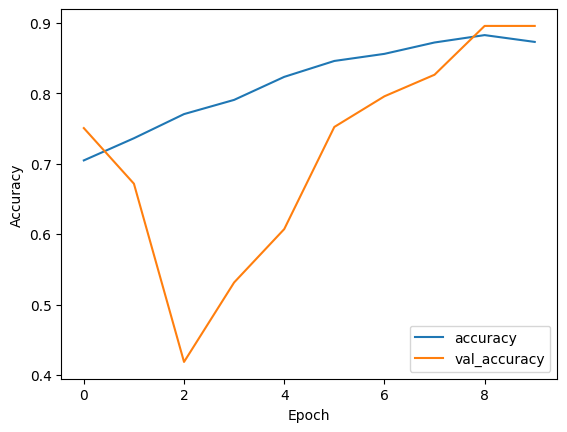

In [ ]:
rnn = RNN()
rnn_model = rnn.configModel()
embeddings_list = train_data['text_embeddings'].tolist()
X = [embedding[0] for embedding in embeddings_list]
X_np = [np.array(embedding) for embedding in X]

max_length = max(len(embedding) for embedding in X_np)
X = pad_sequences(X_np, maxlen=max_length, padding='post', dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history3 = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
y_pred = rnn.predict(X_test, rnn_model)
test_precision, test_recall, test_f1_score, test_loss, test_accuracy = rnn.evaluateRNN(X_test, y_test, y_pred, rnn_model)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
rnn.plotTrainingHistory(history3)

### Classification using CNN

Epoch 1/10
31/31 [==============================] - 12s 282ms/step - loss: 0.6154 - accuracy: 0.6961 - val_loss: 0.6002 - val_accuracy: 0.7867
Epoch 2/10
31/31 [==============================] - 6s 197ms/step - loss: 0.5472 - accuracy: 0.7576 - val_loss: 0.5610 - val_accuracy: 0.7867
Epoch 3/10
31/31 [==============================] - 7s 238ms/step - loss: 0.5302 - accuracy: 0.7591 - val_loss: 0.5424 - val_accuracy: 0.7867
Epoch 4/10
31/31 [==============================] - 6s 195ms/step - loss: 0.5098 - accuracy: 0.7611 - val_loss: 0.5238 - val_accuracy: 0.7867
Epoch 5/10
31/31 [==============================] - 8s 247ms/step - loss: 0.4817 - accuracy: 0.7646 - val_loss: 0.5022 - val_accuracy: 0.7867
Epoch 6/10
31/31 [==============================] - 6s 194ms/step - loss: 0.4511 - accuracy: 0.7722 - val_loss: 0.4711 - val_accuracy: 0.7867
Epoch 7/10
31/31 [==============================] - 8s 250ms/step - loss: 0.4198 - accuracy: 0.7863 - val_loss: 0.4397 - val_accuracy: 0.7867
Epoch

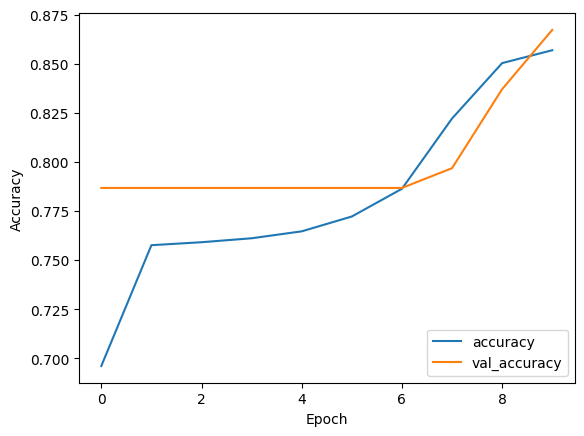

In [ ]:
cnn = CNN()
input_shape = X_train.shape[1:]
cnn_model = cnn.configModel(input_shape)
history4 = cnn_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)
y_pred = cnn.predict(X_test, cnn_model)
test_precision, test_recall, test_f1_score, test_loss, test_accuracy = cnn.evaluateCNN(X_test, y_test, y_pred, cnn_model)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
cnn.plotTrainingHistory(history4)

# After Data Augmentation

## Use Marbert to get embeddings for SVm And Logistic Regression

In [ ]:
path = 'train/data_for_augmentation.csv'
ArbTc = ArabicTextCleaning(path)
data_for_augm = ArbTc.load_data()
data_for_augm = data_for_augm.drop(['id', 'rephrase' ,'dialect'], axis =1)
data_for_augm.rename(columns={'Texte_traduit': 'newtext'}, inplace=True)
data_for_augm['text_embeddings']= data_for_augm['newtext'].apply(Marbert.generate_embeddings)

data_for_augm = data_for_augm.drop(['newtext'], axis =1)

augmented_data = pd.concat([train_data, data_for_augm], axis=0)

augmented_data.reset_index(drop=True, inplace=True)

In [ ]:

embeddings_list = augmented_data['text_embeddings'].tolist()
X = [embedding[0] for embedding in embeddings_list]
X_np = [np.array(embedding) for embedding in X]

# Pad sequences
max_length = max(len(embedding) for embedding in X_np)
X = pad_sequences(X_np, maxlen=max_length, padding='post', dtype='float32')
X = X.reshape((X.shape[0], -1))

y = np.array(augmented_data['sarcastic'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [ ]:
Lr = LogisticRegressionClass()
y_pred = Lr.generatePrediction(X_train, y_train, X_test)
accuracy, f1 = Lr.evaluateModel(y_pred, y_test)
print("Accuracy of Logistic REgression using Marbert embeddings with augmented data:", accuracy)
print("f1 score of Logistic REgression using Marbert embeddings with augmented data:", f1)


Accuracy of Logistic REgression using Marbert embeddings with augmented data: 0.879129734085415
f1 score of Logistic REgression using Marbert embeddings with augmented data: 0.7634069400630914


### SVM

In [ ]:
svm = SVM()
y_pred = svm.generatePredictions(X_train, y_train, X_test)
accuracy, f1 = svm.evaluate_model(y_pred, y_test)
print("Accuracy of SVM using using Marbert embeddings with augmented data:", accuracy)
print("f1 score of SVM using using Marbert embeddings with augmented data:", f1)

Accuracy of SVM using using Marbert embeddings with augmented data: 0.8589846897663175
f1 score of SVM using using Marbert embeddings with augmented data: 0.7154471544715447


## Use Araber to get embeddings for RNN and CNN

In [ ]:
path = 'train/data_for_augmentation.csv'
ArbTc = ArabicTextCleaning(path)
data_for_augm2 = ArbTc.load_data()
data_for_augm2 = data_for_augm2.drop(['id', 'rephrase' ,'dialect'], axis =1)
data_for_augm2.rename(columns={'Texte_traduit': 'newtext'}, inplace=True)
data_for_augm2['text_embeddings']= data_for_augm2['newtext'].apply(Arabert.generate_embeddings)

data_for_augm2 = data_for_augm2.drop(['newtext'], axis =1)

augmented_data2 = pd.concat([train_data, data_for_augm2], axis=0)

augmented_data2.reset_index(drop=True, inplace=True)

In [ ]:

embeddings_list = augmented_data2['text_embeddings'].tolist()
X = [embedding[0] for embedding in embeddings_list]
X_np = [np.array(embedding) for embedding in X]

# Pad sequences
max_length = max(len(embedding) for embedding in X_np)
X = pad_sequences(X_np, maxlen=max_length, padding='post', dtype='float32')
X = X.reshape((X.shape[0], -1))

y = np.array(augmented_data2['sarcastic'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### RNN

Epoch 1/10
156/156 [==============================] - 121s 660ms/step - loss: 1.0794 - accuracy: 0.6178 - val_loss: 1.1752 - val_accuracy: 0.4198
Epoch 2/10
156/156 [==============================] - 115s 739ms/step - loss: 0.6019 - accuracy: 0.7250 - val_loss: 1.0541 - val_accuracy: 0.4746
Epoch 3/10
156/156 [==============================] - 103s 657ms/step - loss: 0.5228 - accuracy: 0.7421 - val_loss: 0.5740 - val_accuracy: 0.7139
Epoch 4/10
156/156 [==============================] - 108s 692ms/step - loss: 0.4890 - accuracy: 0.7582 - val_loss: 0.4454 - val_accuracy: 0.7808
Epoch 5/10
156/156 [==============================] - 102s 656ms/step - loss: 0.4456 - accuracy: 0.7784 - val_loss: 0.4574 - val_accuracy: 0.7784
Epoch 6/10
156/156 [==============================] - 105s 676ms/step - loss: 0.4267 - accuracy: 0.7842 - val_loss: 0.4579 - val_accuracy: 0.7671
Epoch 7/10
156/156 [==============================] - 101s 646ms/step - loss: 0.3801 - accuracy: 0.8185 - val_loss: 0.3751 -

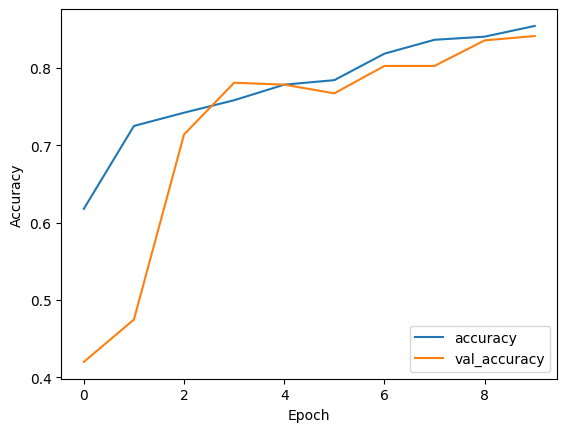

In [ ]:
rnn = RNN()
rnn_model = rnn.configModel()
embeddings_list = augmented_data2['text_embeddings'].tolist()
X = [embedding[0] for embedding in embeddings_list]
X_np = [np.array(embedding) for embedding in X]

max_length = max(len(embedding) for embedding in X_np)
X = pad_sequences(X_np, maxlen=max_length, padding='post', dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history5 = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
y_pred = rnn.predict(X_test, rnn_model)
test_precision, test_recall, test_f1_score, test_loss, test_accuracy = rnn.evaluateRNN(X_test, y_test, y_pred, rnn_model)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
rnn.plotTrainingHistory(history5)

### CNN

Epoch 1/10
63/63 [==============================] - 20s 268ms/step - loss: 0.8060 - accuracy: 0.4521 - val_loss: 0.6035 - val_accuracy: 0.7644
Epoch 2/10
63/63 [==============================] - 16s 248ms/step - loss: 0.5763 - accuracy: 0.7219 - val_loss: 0.5383 - val_accuracy: 0.7664
Epoch 3/10
63/63 [==============================] - 15s 235ms/step - loss: 0.5379 - accuracy: 0.7524 - val_loss: 0.5192 - val_accuracy: 0.7664
Epoch 4/10
63/63 [==============================] - 15s 233ms/step - loss: 0.5226 - accuracy: 0.7584 - val_loss: 0.5046 - val_accuracy: 0.7664
Epoch 5/10
63/63 [==============================] - 15s 232ms/step - loss: 0.5093 - accuracy: 0.7587 - val_loss: 0.4911 - val_accuracy: 0.7674
Epoch 6/10
63/63 [==============================] - 15s 232ms/step - loss: 0.5022 - accuracy: 0.7673 - val_loss: 0.4768 - val_accuracy: 0.7633
Epoch 7/10
63/63 [==============================] - 15s 236ms/step - loss: 0.4754 - accuracy: 0.7698 - val_loss: 0.4611 - val_accuracy: 0.7633

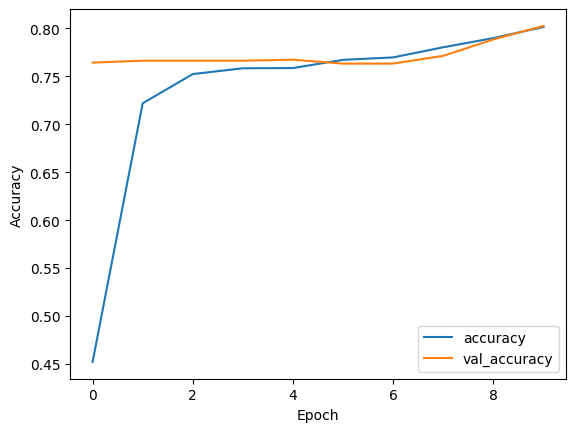

In [ ]:
cnn = CNN()
input_shape = X_train.shape[1:]
cnn_model = cnn.configModel(input_shape)
history6 = cnn_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)
y_pred = cnn.predict(X_test, cnn_model)
test_precision, test_recall, test_f1_score, test_loss, test_accuracy = cnn.evaluateCNN(X_test, y_test, y_pred, cnn_model)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')
cnn.plotTrainingHistory(history6)
